###  Mean square error(MSE)

In [30]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error
import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation

In [32]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [34]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [24]:
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [36]:
# Step 4: Create and train the Polynomial Regression model
model = LinearRegression()  # Initializing the model
model.fit(X_poly, Y)  # Training the model

LinearRegression()

In [38]:
#print the coefficient and intercept
m=model.coef_[0]
c=model.intercept_

In [40]:
#coefficient and intercept
print("Slope/coefficient",m)
print("Intercept",c)

Slope/coefficient 0.0
Intercept 25.834848216909297


In [42]:
print(f'Equation of the line:Y ={m:.2f} X + {c:.2f}')

Equation of the line:Y =0.00 X + 25.83


In [49]:
# Transform input using the same polynomial transformer
X_poly = poly.transform(X)  

# Now predict using the transformed input
Y_pred = model.predict(X_poly)


### Model Evalution metrics: 


In [52]:
#Mean Square Error(mse)
mse=mean_squared_error(Y,Y_pred)
print(f'Mean Square Error(mse): {mse:.2f}')

Mean Square Error(mse): 11.47


In [54]:
#Mean Absolute Error(mae)
mae=mean_absolute_error(Y,Y_pred)
print(f'Mean Absolute Error(mse): {mae:.2f}')

Mean Absolute Error(mse): 2.98


In [56]:
#Root Mean Square Error(rms)
rms=root_mean_squared_error(Y,Y_pred)
print(f'Root Mean Square Error(rms): {rms:.2f}')

Root Mean Square Error(rms): 3.39


In [58]:
#r-squared
r2=r2_score(Y,Y_pred)
print(f'R-Squared(R²): {r2:.2f}')

R-Squared(R²): 0.95


In [60]:
# Adjusted r-squared(R²_adj)
n=len(Y)#no.od obs
p=1#no od independent variabbles
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f"Adjusted R-squared(R²_adj): {adj_r2:.2f}")

Adjusted R-squared(R²_adj): 0.94


In [62]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:33:01   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\jaganasri\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


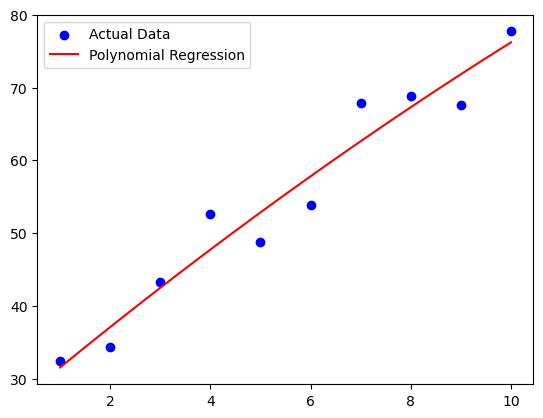

In [79]:
plt.scatter(X, Y, color='blue', label='Actual Data')

# Plot the polynomial regression curve
X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)  # Generate range of values
X_range_poly = poly.transform(X_range)  # Transform the range to polynomial features
y_range = model.predict(X_range_poly)  # Predict the polynomial values

# Plot the polynomial regression curve
plt.plot(X_range, y_range, color='red', label='Polynomial Regression')
plt.legend()
plt.show()